## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import re
import string
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.metrics import confusion_matrix, auc, roc_auc_score, roc_curve, classification_report

import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

# Load data

In [2]:
df = pd.DataFrame(pd.read_csv('spam.csv', encoding='latin-1'))

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df = df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'], axis=1)

In [5]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
df.columns = ['labels','messages']

In [7]:
df.head()

,labels,messages
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
y = df['labels'].value_counts()

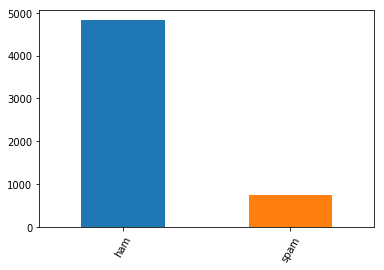

In [9]:
y.plot(kind='bar', rot=60)

## Data preparation

In [10]:
#A list of contractions from http://stackoverflow.com/questions/19790188/expanding-english-language-contractions-in-python
contractions = { 
"ain't": "am not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he's": "he is",
"how'd": "how did",
"how'll": "how will",
"how's": "how is",
"i'd": "i would",
"i'll": "i will",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'll": "it will",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"must've": "must have",
"mustn't": "must not",
"needn't": "need not",
"oughtn't": "ought not",
"shan't": "shall not",
"sha'n't": "shall not",
"she'd": "she would",
"she'll": "she will",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"that'd": "that would",
"that's": "that is",
"there'd": "there had",
"there's": "there is",
"they'd": "they would",
"they'll": "they will",
"they're": "they are",
"they've": "they have",
"wasn't": "was not",
"we'd": "we would",
"we'll": "we will",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"where'd": "where did",
"where's": "where is",
"who'll": "who will",
"who's": "who is",
"won't": "will not",
"wouldn't": "would not",
"you'd": "you would",
"you'll": "you will",
"you're": "you are"
}


In [11]:
def clean_text(text, remove_stopwords = True, lemmatization = True):
    
    # Convert words to lower case
    text = text.lower()
    lemmatizer = WordNetLemmatizer()
    #w_tokenizer = word_tokenize()
    
    # Replace contractions with their longer forms 
    if True:
        text = text.split()
        new_text = []
        for word in text:
            if word in contractions:
                new_text.append(contractions[word])
            else:
                new_text.append(word)
        text = " ".join(new_text)
    
    # Format words and remove unwanted characters
    text = re.sub(r'https?:\/\/.*[\r\n]*', ' ', text,  
                  flags=re.MULTILINE)
    text = re.sub(r'\<a href', ' ', text)
    text = re.sub(r'&amp;', ' ', text) 
    text = re.sub(r'[_"\--;%()|+&=*%.,!?:#$@\[\]/<>]', ' ', text)
    text = re.sub(r'<br />', ' ', text)
    text = re.sub(r'\'', ' ', text)
    text = re.sub(r'\d+\S\d+\S\d+', ' ', text)
    text = re.sub(r'\d+', ' ', text)
    text = re.sub(r'\[[0-9]*\]',' ',text)
#     text = re.sub(r'\s+',' ',text)
    text = re.sub(r"\b[a-z]\b", " ", text)
    
    # Optionally, remove stop words
    if remove_stopwords:
        text = text.split()
        stops = set(stopwords.words("english") + list(string.punctuation))
        text = [w for w in text if not w in stops]
        text = " ".join(text)
    
    if lemmatization:
        text = [lemmatizer.lemmatize(w) for w in word_tokenize(text)]
        text = " ".join(text)

    return text

In [12]:
clean_messages = []
for message in df.messages:
    #print(msg)
    clean_messages.append(clean_text(message, remove_stopwords=True, lemmatization=True))
print("Message cleaning complete.")

Message cleaning complete.


In [13]:
# clean_messages

In [14]:
clean_message1 = []
for i in clean_messages:
    clean_message1.append(re.sub('(\\b[A-Za-z] \\b|\\b [A-Za-z]\\b)', '', i))

In [15]:
# clean_message1

In [16]:
words = set(nltk.corpus.words.words())
clean = []
for i in clean_message1:
    clean.append(" ".join(w for w in nltk.wordpunct_tokenize(i) if w.lower() in words or not w.isalpha()))

In [17]:
# clean

In [18]:
df['key_words'] = clean

In [19]:
df.head()

,labels,messages,key_words
0,ham,"Go until jurong point, crazy.. Available only ...",go point crazy available great world la buffet...
1,ham,Ok lar... Joking wif u oni...,lar
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry win fa cup final st may text fa rec...
3,ham,U dun say so early hor... U c already then say...,dun say early already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",think go life around though


In [20]:
df['labels'] = df['labels'].map( {'spam': 1, 'ham':0} ).astype(int)

In [21]:
df.head()

,labels,messages,key_words
0,0,"Go until jurong point, crazy.. Available only ...",go point crazy available great world la buffet...
1,0,Ok lar... Joking wif u oni...,lar
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entry win fa cup final st may text fa rec...
3,0,U dun say so early hor... U c already then say...,dun say early already say
4,0,"Nah I don't think he goes to usf, he lives aro...",think go life around though


## TF-IDF

In [22]:
# count = CountVectorizer()
tfidf = TfidfVectorizer()
count_matrix = tfidf.fit_transform(df['key_words'])

In [23]:
count_matrix.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [24]:
pd.DataFrame(count_matrix.toarray(), columns=tfidf.get_feature_names()).head()

,aa,abbey,abdomen,ability,able,abnormally,abroad,absence,absolutely,abstract,...,young,younger,yr,yummy,zac,zebra,zed,zero,zoom,ì¼
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
count_matrix.shape

(5572, 3869)

In [26]:
df['labels'].shape

(5572,)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(count_matrix,df['labels'], test_size=0.3, random_state=21)

In [28]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(3900, 3869)
(3900,)
(1672, 3869)
(1672,)


## Build a model

In [29]:
naive = MultinomialNB()

In [30]:
naive.fit(X_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [31]:
naive.score(X_train,y_train)

0.9717948717948718

In [32]:
test_arr = ['I am a boy','i want free entry']
x_test = pd.Series(test_arr)
x_test = tfidf.transform(test_arr)
y_pred_class1 = naive.predict(X_test)
y_pred_class1

array([0, 0, 0, ..., 1, 0, 0])

In [33]:
y_pred = naive.predict(X_test)

In [34]:
naive.score(X_test,y_test)

0.958732057416268

In [35]:
confusion_matrix(y_pred,y_test)

array([[1443,   64],
       [   5,  160]])

In [36]:
print(classification_report(y_pred,y_test))

             precision    recall  f1-score   support

          0       1.00      0.96      0.98      1507
          1       0.71      0.97      0.82       165

avg / total       0.97      0.96      0.96      1672



In [37]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

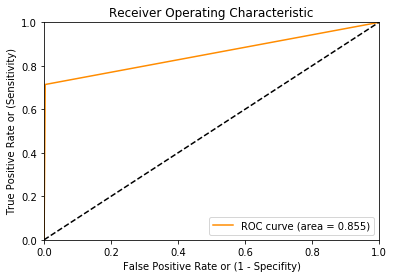

In [38]:
# Plot ROC curve
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

In [39]:
roc_auc_score(y_test, y_pred)

0.8554163378058406